In [60]:
import pandas as pd

df = pd.read_csv("./housing/housing.csv")

In [61]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [62]:
# retrait des 500 001 sur la colonne 'median_house_value'
# df = df[df['median_house_value'] != 500001]

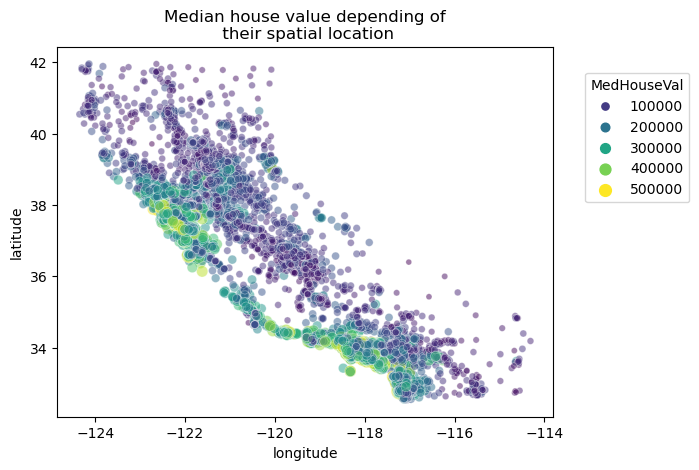

In [64]:
df = df[df['median_house_value'] != 500001]
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df,
    x=df["longitude"],
    y=df["latitude"],
    size=df["median_house_value"],
    hue=df["median_house_value"],
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

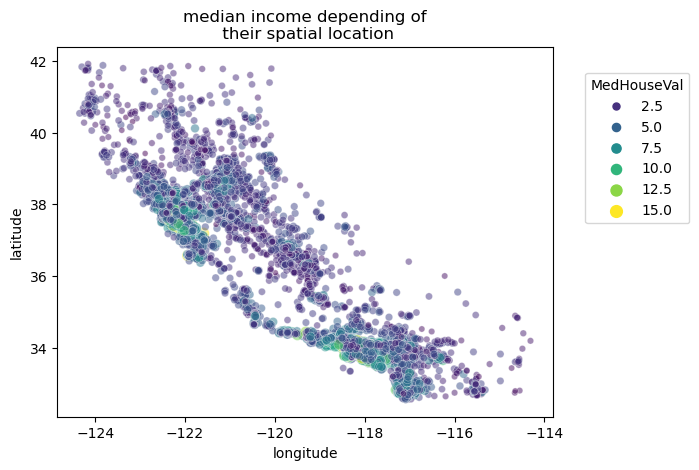

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df,
    x=df["longitude"],
    y=df["latitude"],
    size=df["median_income"],
    hue=df["median_income"],
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("median income depending of\n their spatial location")

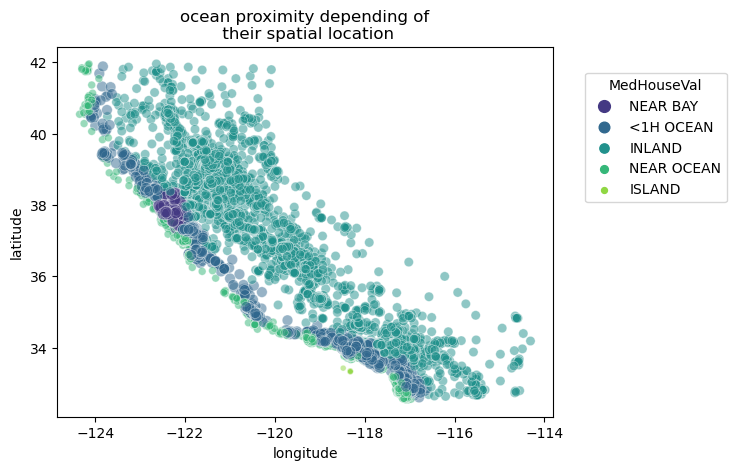

In [8]:
sns.scatterplot(
    data=df,
    x=df["longitude"],
    y=df["latitude"],
    size=df["ocean_proximity"],
    hue=df["ocean_proximity"],
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("ocean proximity depending of\n their spatial location")

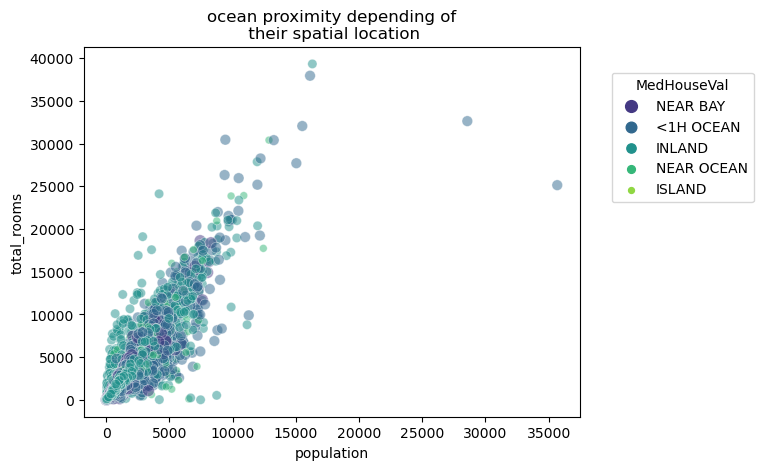

In [9]:
sns.scatterplot(
    data=df,
    x=df["population"],
    y=df["total_rooms"],
    size=df["ocean_proximity"],
    hue=df["ocean_proximity"],
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("ocean proximity depending of\n their spatial location")

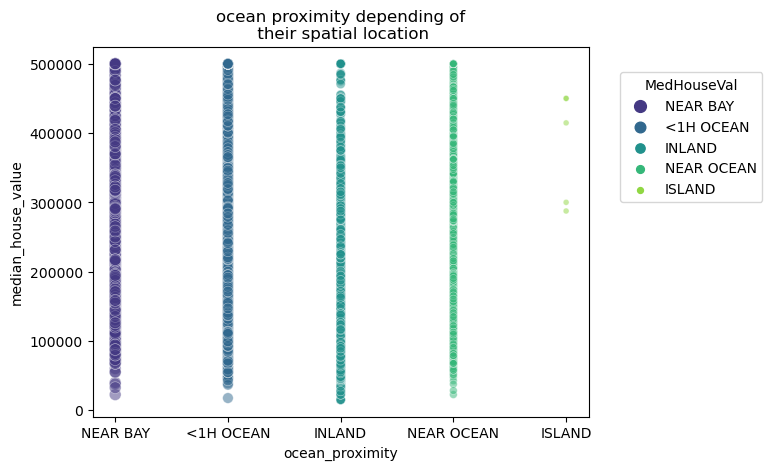

In [16]:
sns.scatterplot(
    data=df,
    x=df["ocean_proximity"],
    y=df["median_house_value"],
    size=df["ocean_proximity"],
    hue=df["ocean_proximity"],
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("ocean proximity depending of\n their spatial location")

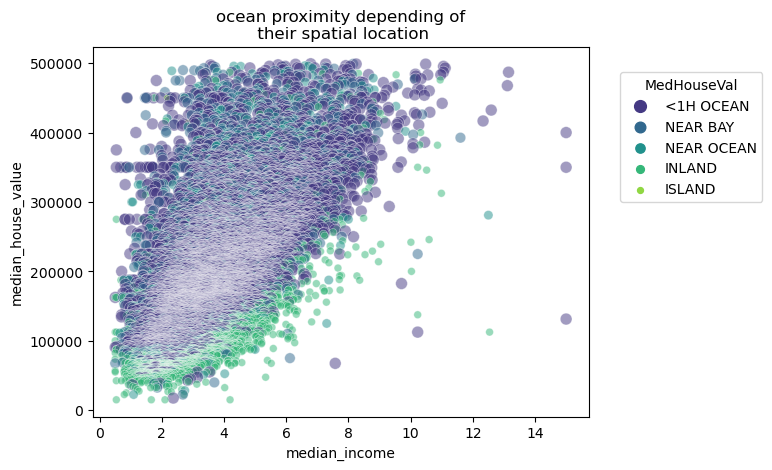

In [27]:
df_delete_max_y = df[(df['median_house_value'] != 500001) & (df['median_house_value'] != 500000)]
df_delete_max_y = df_delete_max_y.sort_values(by='median_house_value', ascending=False)

sns.scatterplot(
    data=df_delete_max_y,
    x=df_delete_max_y["median_income"],
    y=df_delete_max_y["median_house_value"],
    size=df_delete_max_y["ocean_proximity"],
    hue=df_delete_max_y["ocean_proximity"],
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("ocean proximity depending of\n their spatial location")

IndexError: index 15317 is out of bounds for axis 0 with size 4128

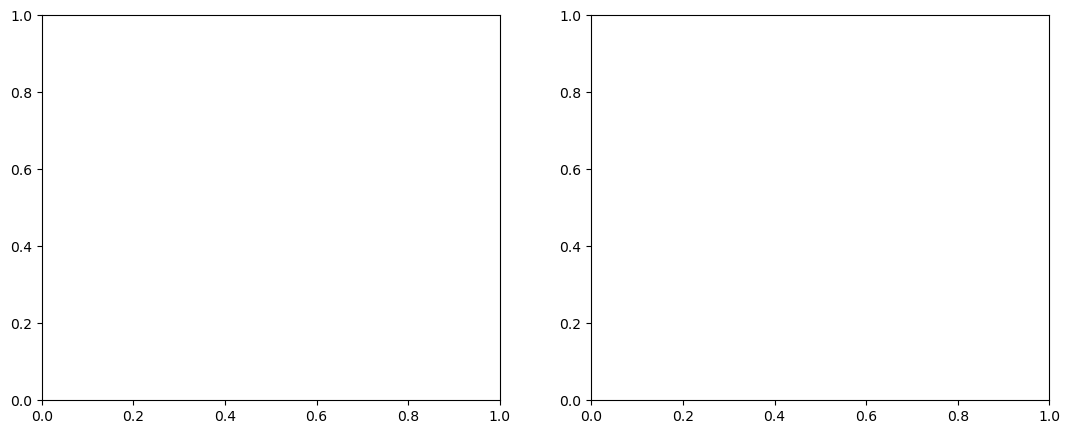

In [37]:
from sklearn.model_selection import train_test_split

y=df['median_house_value']
X=df.drop('median_house_value', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(13, 5))

PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_test,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[0],
)
axs[0].axis("square")
axs[0].set_xlabel("Predicted values (k$)")
axs[0].set_ylabel("True values (k$)")

PredictionErrorDisplay.from_predictions(
    y_true=target_test,
    y_pred=target_predicted,
    kind="residual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[1],
)
axs[1].axis("square")
axs[1].set_xlabel("Predicted values (k$)")
axs[1].set_ylabel("Residual values (k$)")

IndexError: index 10799 is out of bounds for axis 0 with size 4128

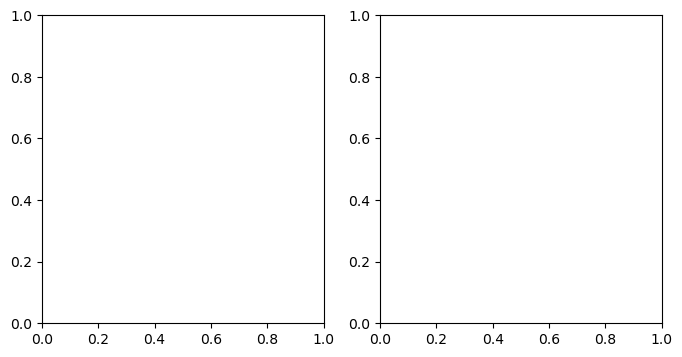

In [43]:
from sklearn.model_selection import train_test_split

y=df['median_house_value']
X=df.drop('median_house_value', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

from sklearn.metrics import PredictionErrorDisplay

y_pred = y_test
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred= y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

# modifie la colonne "ocean proximity" en int

In [13]:
df_ocean_proximity = df
print(df_ocean_proximity["ocean_proximity"].unique())

df_ocean_proximity = df_ocean_proximity.dropna(subset=["ocean_proximity"])
print(df_ocean_proximity["ocean_proximity"].unique())

df_ocean_proximity["ocean_proximity"] = df_ocean_proximity["ocean_proximity"].replace('ISLAND', '0')
df_ocean_proximity["ocean_proximity"] = df_ocean_proximity["ocean_proximity"].replace('NEAR BAY', '1')
df_ocean_proximity["ocean_proximity"] = df_ocean_proximity["ocean_proximity"].replace('NEAR OCEAN', '2')
df_ocean_proximity["ocean_proximity"] = df_ocean_proximity["ocean_proximity"].replace('<1H OCEAN', '3')
df_ocean_proximity["ocean_proximity"] = df_ocean_proximity["ocean_proximity"].replace('INLAND', '4')

print(df_ocean_proximity)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24   

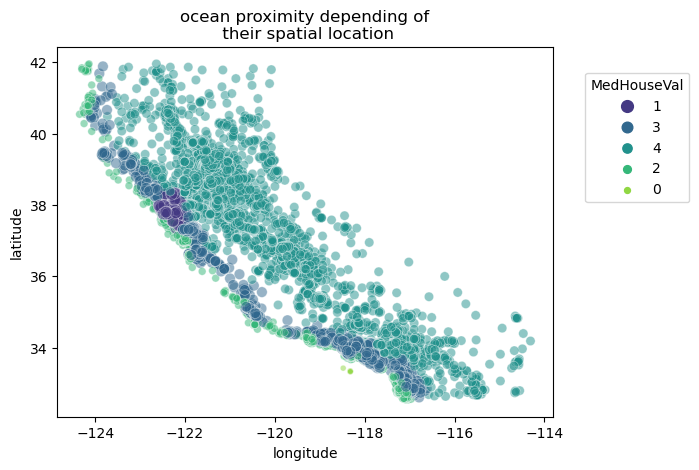

In [11]:
sns.scatterplot(
    data=df,
    x=df_ocean_proximity["longitude"],
    y=df_ocean_proximity["latitude"],
    size=df_ocean_proximity["ocean_proximity"],
    hue=df_ocean_proximity["ocean_proximity"],
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("ocean proximity depending of\n their spatial location")